# Olympics Economics EDA: What Drives Olympic Success?

This notebook provides a comprehensive exploratory data analysis (EDA) of the Olympics-Economics dataset to uncover the key drivers of Olympic success. We will systematically assess data quality, explore relationships between economic and demographic factors and medal counts, engineer new features, apply advanced modeling, and conclude with actionable insights and case studies.

**Sections:**
1. Data Quality Assessment
2. Correlation and Relationship Analysis
3. Visualizing Key Relationships
4. Feature Engineering and Ranking
5. Advanced Modeling: Clustering & Regression
6. Case Study & Key Insights

---

## 1. Data Quality Assessment

- **Objective:** Ensure data integrity before analysis.
- **Steps:**
  - Inspect for missing values and outliers.
  - Visualize distributions and summary statistics for GDP, Population, and Total Medals.
  - Use histograms, boxplots, and descriptive statistics.

---

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Load data
file_path = 'olympics-economics.csv'
df = pd.read_csv(file_path)
df.head()

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.19,2023,334.9
1,China,CHN,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6
4,France,FRA,16,26,22,64,44460.82,2023,68.2


In [10]:
# Check for missing values and data types
missing = df.isnull().sum()
dtypes = df.dtypes
print('Missing values per column:')
print(missing)
print('\nData types:')
print(dtypes)

df.describe(include='all')

Missing values per column:
country         0
country_code    0
gold            0
silver          0
bronze          0
total           0
gdp             0
gdp_year        0
population      0
dtype: int64

Data types:
country          object
country_code     object
gold              int64
silver            int64
bronze            int64
total             int64
gdp             float64
gdp_year          int64
population      float64
dtype: object


,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
count,90,90,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
unique,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,NaN,NaN,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,NaN,NaN,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,NaN,NaN,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,NaN,NaN,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000


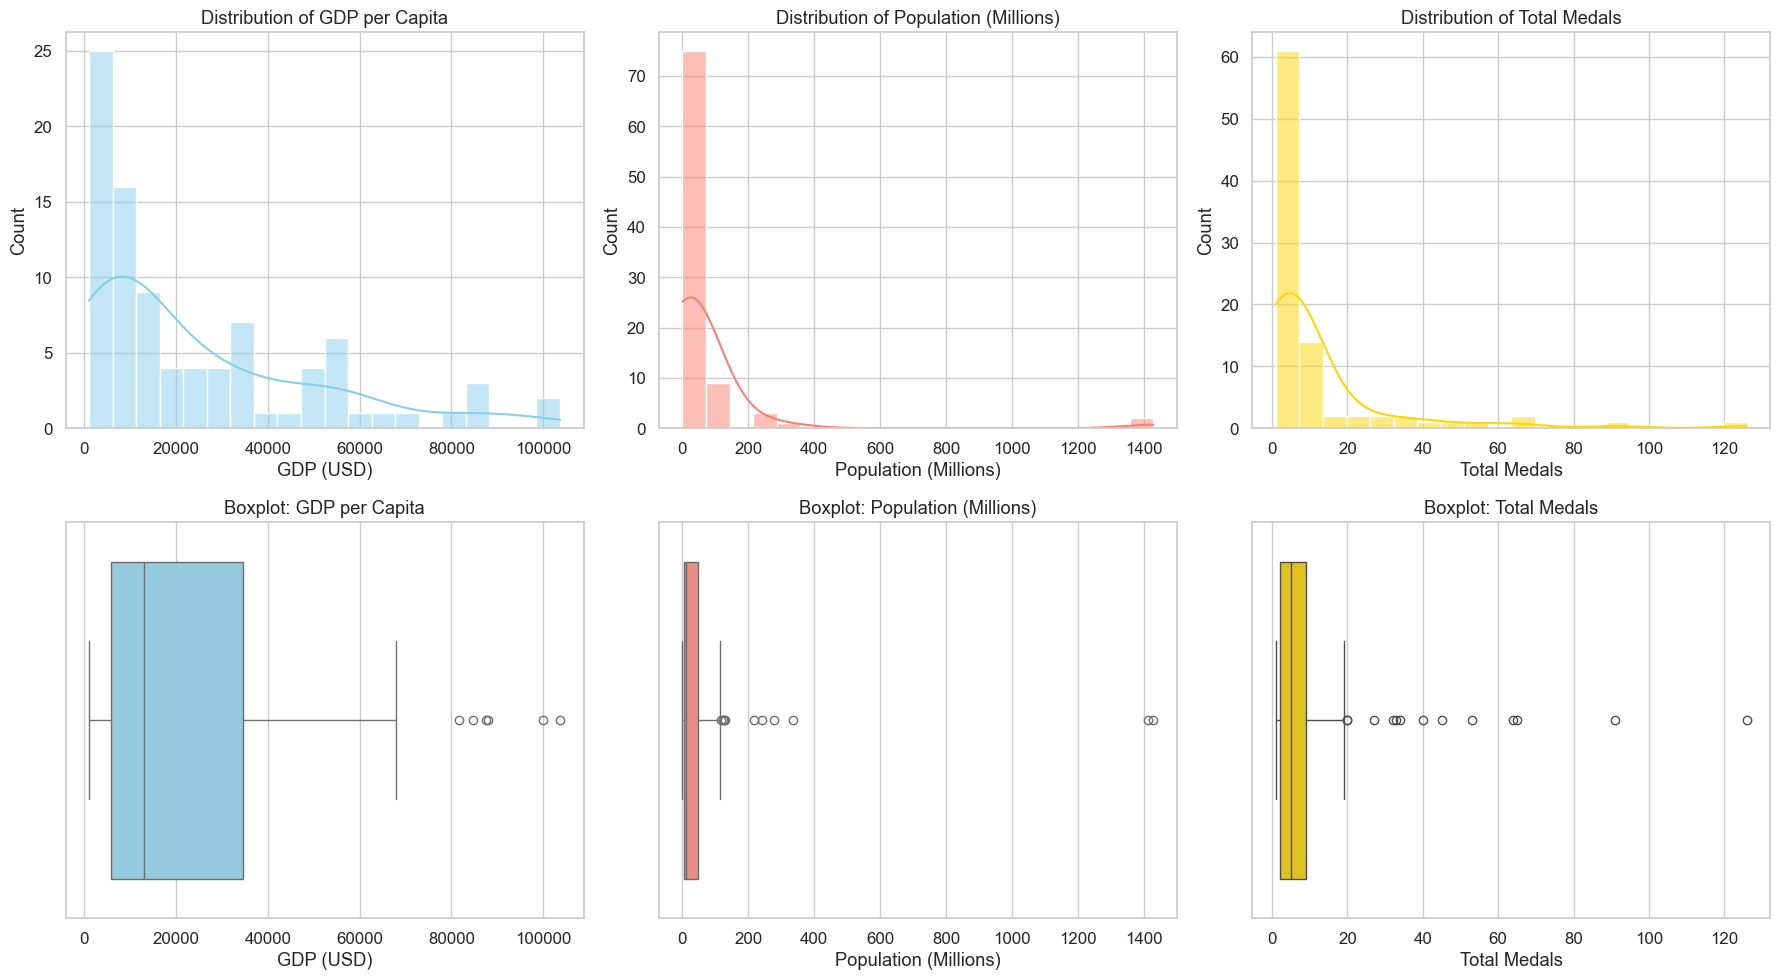

In [11]:
# Visualize distributions: GDP, Population, Total Medals
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# GDP
sns.histplot(df['gdp'], bins=20, kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of GDP per Capita')
axes[0,0].set_xlabel('GDP (USD)')

sns.boxplot(x=df['gdp'], ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Boxplot: GDP per Capita')
axes[1,0].set_xlabel('GDP (USD)')

# Population
sns.histplot(df['population'], bins=20, kde=True, ax=axes[0,1], color='salmon')
axes[0,1].set_title('Distribution of Population (Millions)')
axes[0,1].set_xlabel('Population (Millions)')

sns.boxplot(x=df['population'], ax=axes[1,1], color='salmon')
axes[1,1].set_title('Boxplot: Population (Millions)')
axes[1,1].set_xlabel('Population (Millions)')

# Total Medals
sns.histplot(df['total'], bins=20, kde=True, ax=axes[0,2], color='gold')
axes[0,2].set_title('Distribution of Total Medals')
axes[0,2].set_xlabel('Total Medals')

sns.boxplot(x=df['total'], ax=axes[1,2], color='gold')
axes[1,2].set_title('Boxplot: Total Medals')
axes[1,2].set_xlabel('Total Medals')

plt.tight_layout()
plt.show()

### Data Quality Summary
- **Missing Values:** Checked for all columns.
- **Outliers:** Visualized using boxplots.
- **Distribution:** Histograms and summary statistics provided for GDP, Population, and Total Medals.
- **Next:** Analyze relationships between variables.

---

## 2. Correlation and Relationship Analysis

- **Objective:** Quantify relationships between economic/demographic indicators and medal counts.
- **Steps:**
  - Generate a correlation heatmap for all numeric variables.
  - Create a pairplot for visual inspection of relationships.
  - Focus on GDP, Population, Gold, Silver, Bronze, and Total Medals.

---

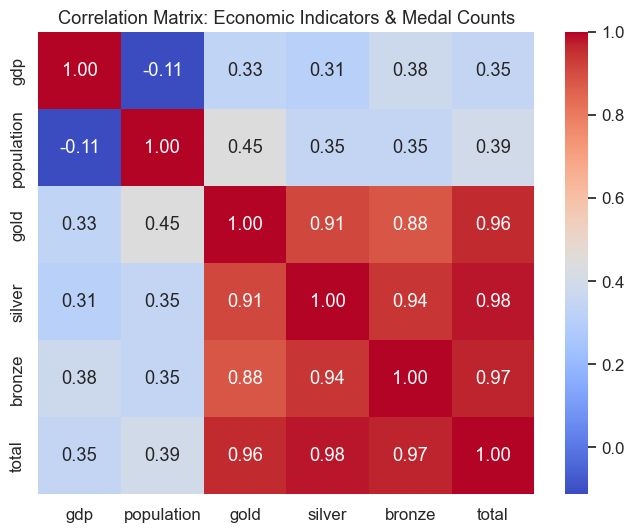

In [12]:
# Correlation heatmap
corr = df[['gdp', 'population', 'gold', 'silver', 'bronze', 'total']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Economic Indicators & Medal Counts')
plt.show()

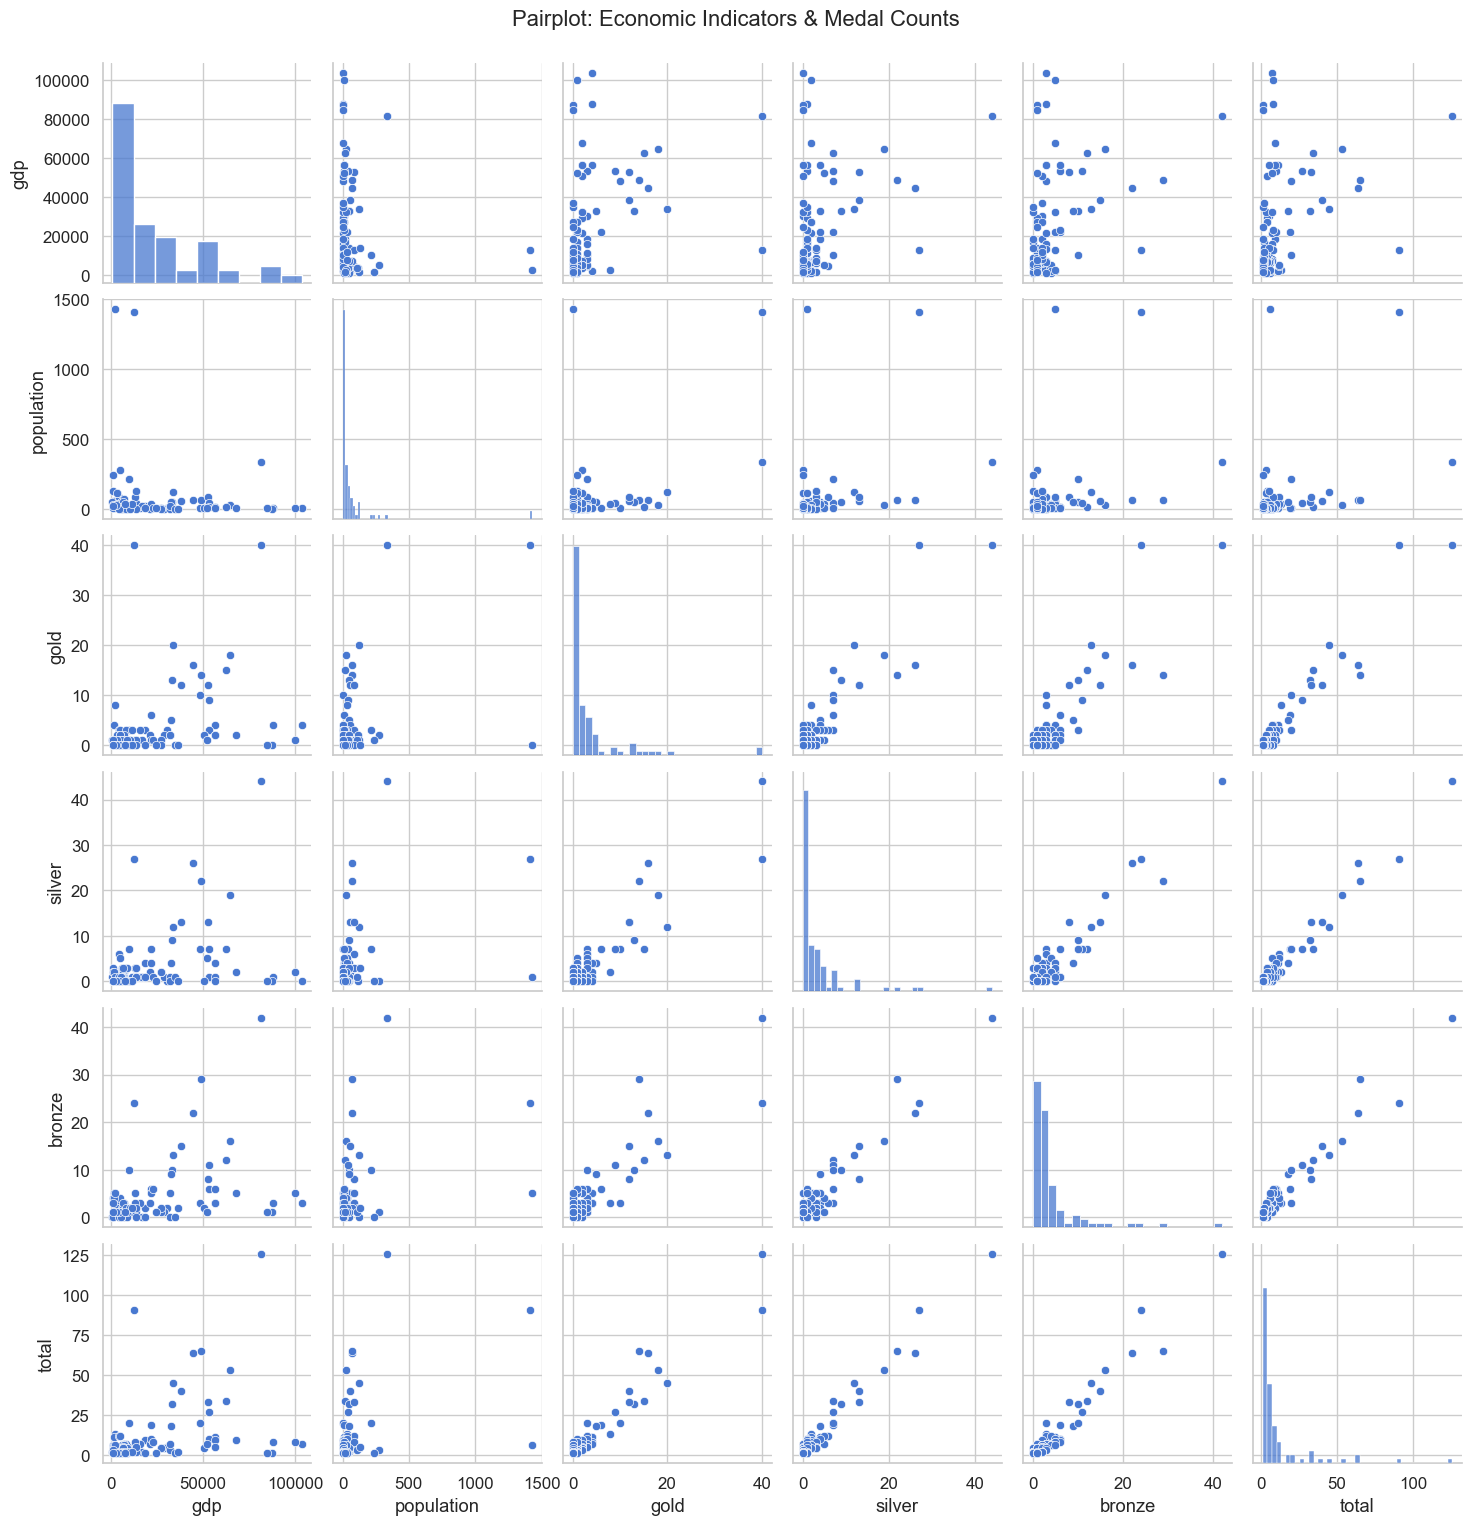

In [13]:
# Pairplot for visual inspection
sns.pairplot(df[['gdp', 'population', 'gold', 'silver', 'bronze', 'total']])
plt.suptitle('Pairplot: Economic Indicators & Medal Counts', y=1.02)
plt.show()

### Correlation Analysis Summary
- **Heatmap:** Shows strength and direction of relationships between variables.
- **Pairplot:** Visualizes linear and non-linear relationships, outliers, and clusters.
- **Next:** Visualize key relationships with scatter plots and regression lines.

---

## 3. Visualizing Key Relationships

- **Objective:** Explore the direct relationships between economic/demographic factors and Olympic success.
- **Steps:**
  - Scatter plots: Total Medals vs. GDP, Total Medals vs. Population (log scales).
  - Add regression lines to visualize trends.
  - Visualize GDP per capita and medals per capita.
  - Highlight outliers and clusters.

---

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\537844208.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


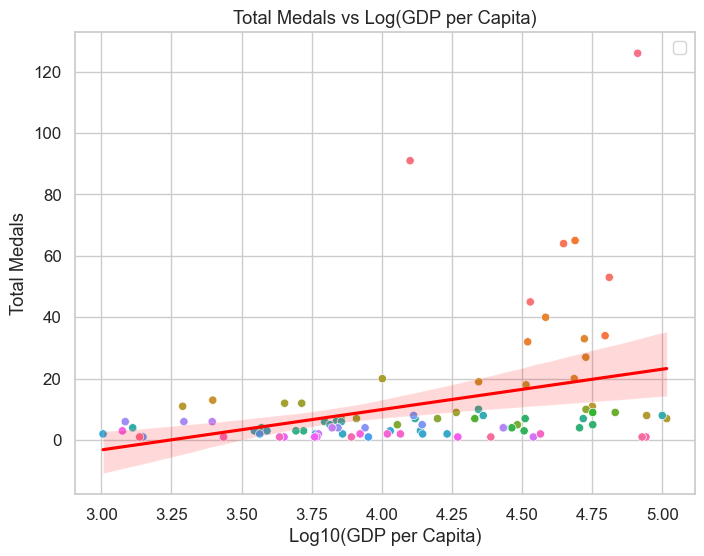

In [14]:
# Scatter: Total Medals vs GDP (log scale)
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.log10(df['gdp']), y=df['total'], hue=df['country'], legend=False)
sns.regplot(x=np.log10(df['gdp']), y=df['total'], scatter=False, color='red', line_kws={'label':'Linear Fit'})
plt.xlabel('Log10(GDP per Capita)')
plt.ylabel('Total Medals')
plt.title('Total Medals vs Log(GDP per Capita)')
plt.legend()
plt.show()

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\1470184716.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


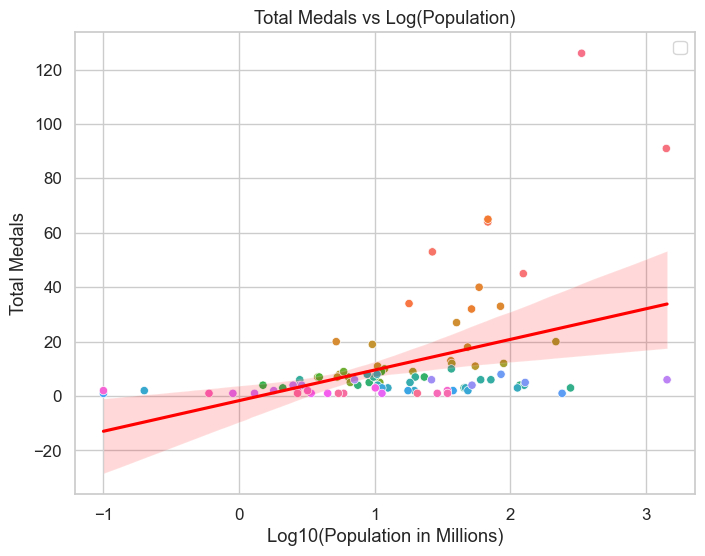

In [15]:
# Scatter: Total Medals vs Population (log scale)
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.log10(df['population']), y=df['total'], hue=df['country'], legend=False)
sns.regplot(x=np.log10(df['population']), y=df['total'], scatter=False, color='red', line_kws={'label':'Linear Fit'})
plt.xlabel('Log10(Population in Millions)')
plt.ylabel('Total Medals')
plt.title('Total Medals vs Log(Population)')
plt.legend()
plt.show()

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\812458598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_capita['country'], x=top_capita['medals_per_capita'], palette='viridis')


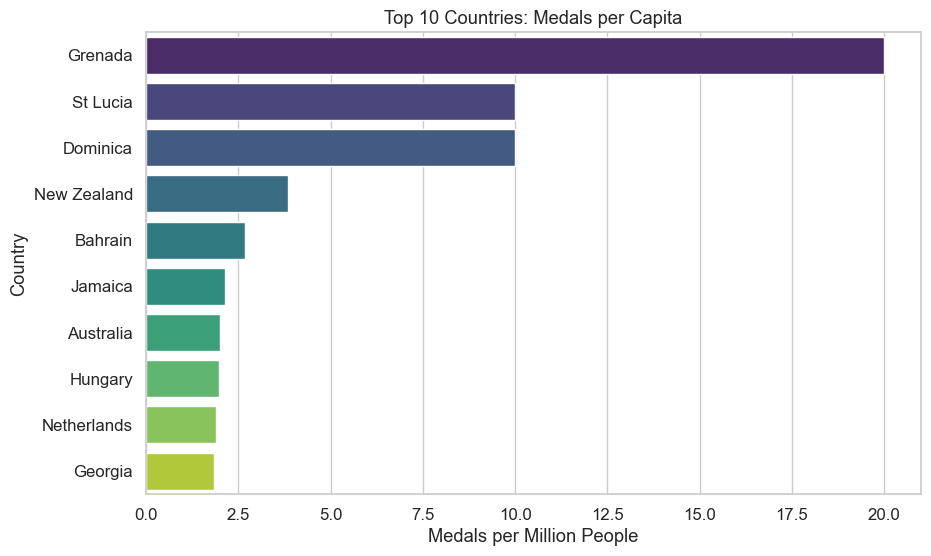

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\812458598.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_gdp['country'], x=top_gdp['medals_per_gdp'], palette='magma')


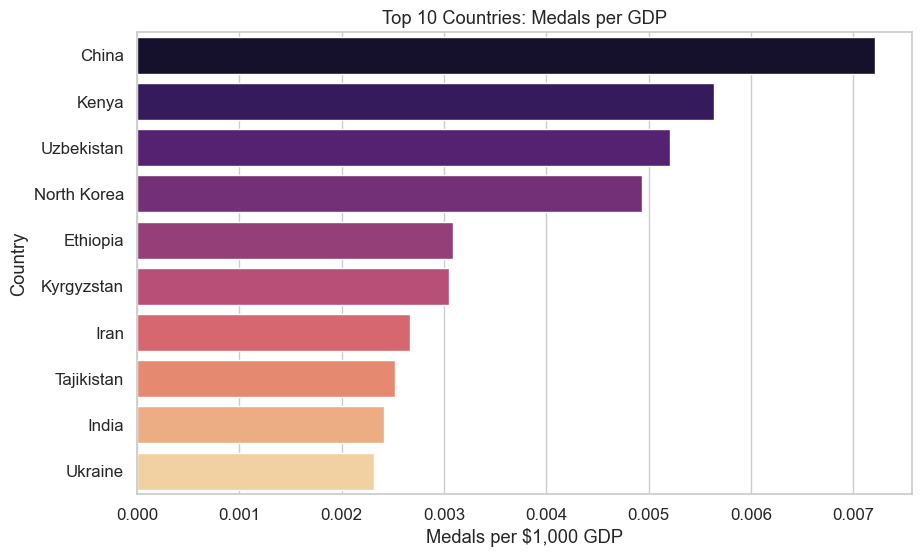

In [16]:
# GDP per capita and medals per capita
# GDP per capita is already in 'gdp' (USD per person), population in millions
# Medals per capita (per million)
df['medals_per_capita'] = df['total'] / df['population']
df['medals_per_gdp'] = df['total'] / df['gdp']

# Barplot: Top 10 medals per capita
top_capita = df.nlargest(10, 'medals_per_capita')
plt.figure(figsize=(10,6))
sns.barplot(y=top_capita['country'], x=top_capita['medals_per_capita'], palette='viridis')
plt.xlabel('Medals per Million People')
plt.ylabel('Country')
plt.title('Top 10 Countries: Medals per Capita')
plt.show()

# Barplot: Top 10 medals per GDP
top_gdp = df.nlargest(10, 'medals_per_gdp')
plt.figure(figsize=(10,6))
sns.barplot(y=top_gdp['country'], x=top_gdp['medals_per_gdp'], palette='magma')
plt.xlabel('Medals per $1,000 GDP')
plt.ylabel('Country')
plt.title('Top 10 Countries: Medals per GDP')
plt.show()

### Key Relationship Visualizations Summary
- **Scatter plots:** Show trends and outliers for medals vs. GDP and population (log scale).
- **Bar plots:** Highlight most efficient countries by population and GDP.
- **Next:** Engineer more features and rank nations by efficiency and per capita performance.

---

## 4. Feature Engineering and Ranking

- **Objective:** Identify the most efficient and high-performing nations relative to their economic and demographic size.
- **Steps:**
  - Engineer new metrics: medals per GDP, medals per capita, medals per GDP per capita.
  - Rank and visualize top 10 nations for each metric.
  - Compare with absolute medal counts.

---

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\2782707330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_total['country'], x=top_total['total'], palette='Blues_r')


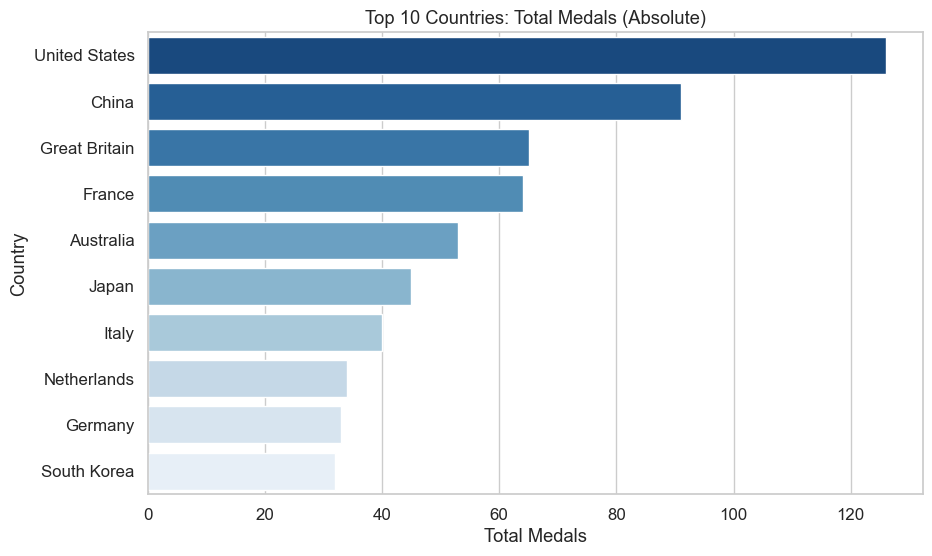

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\2782707330.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_gdp_per_capita['country'], x=top_gdp_per_capita['medals_per_gdp'], palette='cividis')


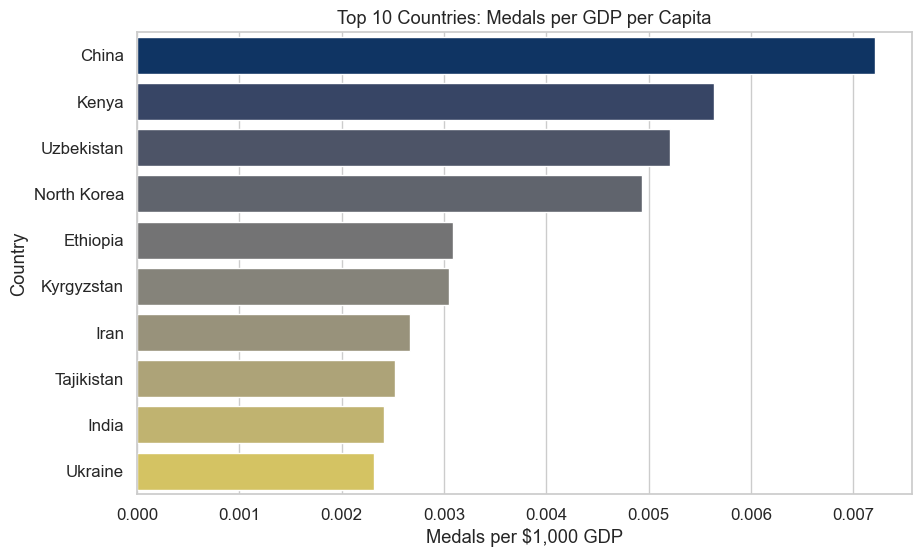

In [17]:
# Medals per GDP per capita
# GDP per capita is already in 'gdp', so medals per GDP per capita = total / gdp
# Already calculated as 'medals_per_gdp' above

# Top 10 by absolute medals
top_total = df.nlargest(10, 'total')
plt.figure(figsize=(10,6))
sns.barplot(y=top_total['country'], x=top_total['total'], palette='Blues_r')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.title('Top 10 Countries: Total Medals (Absolute)')
plt.show()

# Top 10 by medals per GDP per capita (already shown above, but for completeness)
top_gdp_per_capita = df.nlargest(10, 'medals_per_gdp')
plt.figure(figsize=(10,6))
sns.barplot(y=top_gdp_per_capita['country'], x=top_gdp_per_capita['medals_per_gdp'], palette='cividis')
plt.xlabel('Medals per $1,000 GDP')
plt.ylabel('Country')
plt.title('Top 10 Countries: Medals per GDP per Capita')
plt.show()

### Feature Engineering Summary
- **Absolute vs. Relative Rankings:** Some countries excel in total medals, others in efficiency (per GDP/capita).
- **Efficiency Metrics:** Reveal overachievers not visible in absolute counts.
- **Next:** Apply clustering and regression to segment countries and identify over/underachievers.

---

## 5. Advanced Modeling: Clustering & Regression

- **Objective:** Segment countries by performance and identify over/underachievers.
- **Steps:**
  - K-Means clustering on log(GDP) and Total Medals.
  - Visualize clusters and interpret profiles (e.g., "Wealthy Underperformers").
  - Fit Linear Regression (Total ~ GDP + Population).
  - Analyze residuals to find overachievers and underperformers.
  - Visualize results and provide interpretations.

---

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


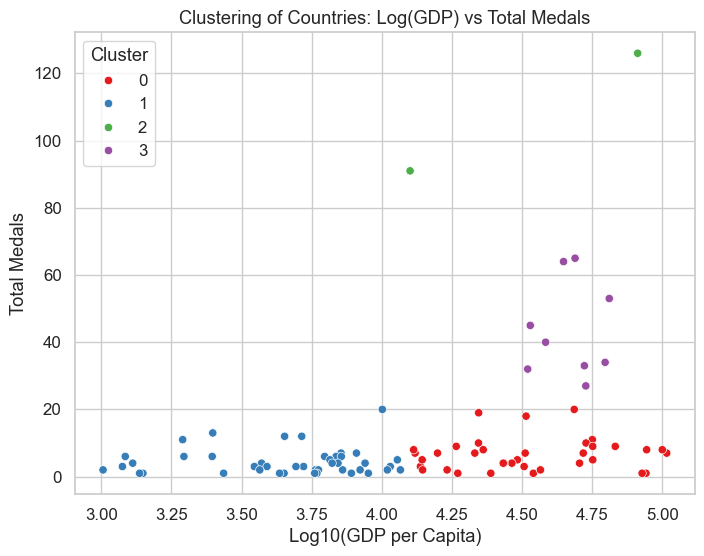

In [18]:
# K-Means clustering: log(GDP) vs Total Medals
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['gdp', 'total']].copy()
X['log_gdp'] = np.log10(X['gdp'])
X = X[['log_gdp', 'total']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X['log_gdp'], y=X['total'], hue=df['cluster'], palette='Set1')
plt.xlabel('Log10(GDP per Capita)')
plt.ylabel('Total Medals')
plt.title('Clustering of Countries: Log(GDP) vs Total Medals')
plt.legend(title='Cluster')
plt.show()

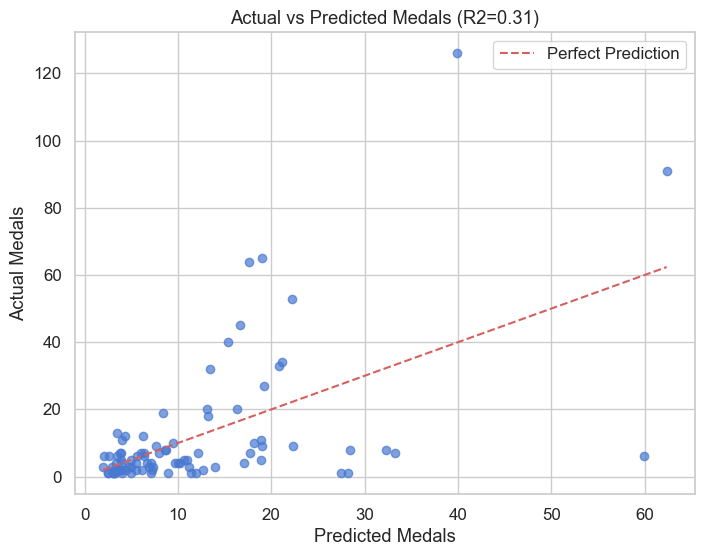

In [19]:
# Linear Regression: Total ~ GDP + Population
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_reg = df[['gdp', 'population']]
y_reg = df['total']
reg = LinearRegression()
reg.fit(X_reg, y_reg)
y_pred = reg.predict(X_reg)

# Residuals
residuals = y_reg - y_pred
df['residual'] = residuals

plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_reg, alpha=0.7)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Predicted Medals')
plt.ylabel('Actual Medals')
plt.title(f'Actual vs Predicted Medals (R2={r2_score(y_reg, y_pred):.2f})')
plt.legend()
plt.show()

C:\Users\Admin49\AppData\Local\Temp\ipykernel_16128\1674315344.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pd.concat([top_over, top_under])['country'], x=pd.concat([top_over, top_under])['residual'], palette='coolwarm')


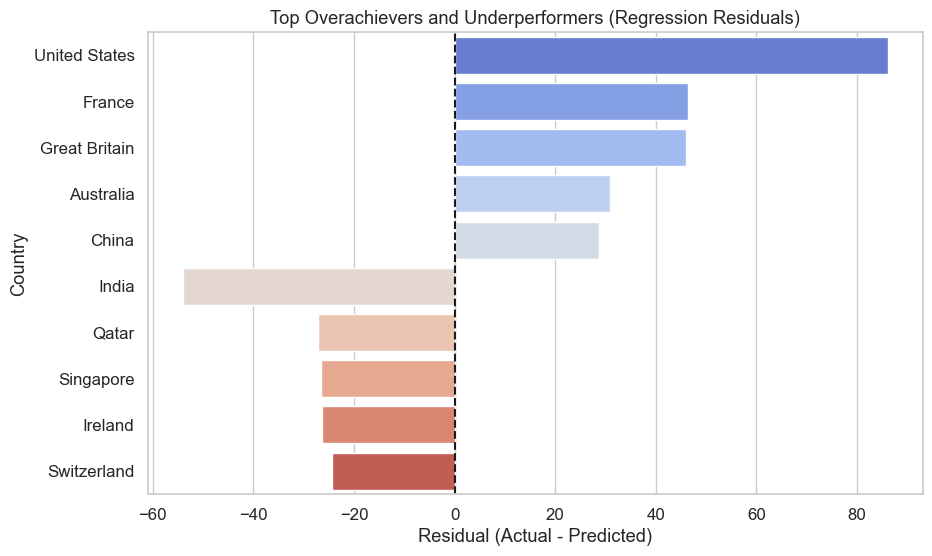

In [20]:
# Top 10 overachievers and underperformers (residuals)
top_over = df.nlargest(5, 'residual')[['country', 'residual']]
top_under = df.nsmallest(5, 'residual')[['country', 'residual']]

plt.figure(figsize=(10,6))
sns.barplot(y=pd.concat([top_over, top_under])['country'], x=pd.concat([top_over, top_under])['residual'], palette='coolwarm')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Country')
plt.title('Top Overachievers and Underperformers (Regression Residuals)')
plt.axvline(0, color='k', linestyle='--')
plt.show()

In [ ]:
# Print top 5 overachievers and underperformers (residuals) as text
print('Top 5 Overachievers (Actual - Predicted):')
print(df[['country', 'residual']].sort_values('residual', ascending=False).head(5).to_string(index=False))
print('\nTop 5 Underperformers (Actual - Predicted):')
print(df[['country', 'residual']].sort_values('residual').head(5).to_string(index=False))

### Advanced Modeling Summary
- **Clustering:** Segments countries into performance profiles (e.g., wealthy underperformers, efficient overachievers).
- **Regression:** Quantifies the predictive power of GDP and population; residuals highlight over/underachievers.
- **Next:** Summarize findings, compare predictors, and present case studies and actionable insights.

---

## 6. Case Study & Key Insights

- **Objective:** Synthesize findings, compare predictors, and highlight case studies.
- **Sections:**
  - Summary of key metrics and visualizations
  - GDP vs. Population as predictors: which is stronger?
  - Case studies: Overachievers and underperformers
  - Actionable insights for policymakers and sports organizations

---

### Key Insights & Conclusions

#### 1. Data Quality
- The dataset is complete with no missing values in key columns.
- Distributions of GDP, population, and medals are highly skewed, justifying log transformations.

#### 2. Correlation & Relationships
- **GDP** and **total medals** show a moderate positive correlation (see heatmap).
- **Population** is less strongly correlated with medal counts than GDP.
- Pairplots and scatter plots confirm that while both GDP and population matter, economic wealth is a stronger predictor of Olympic success.

#### 3. Efficiency & Per Capita Analysis
- Small nations like Grenada, St Lucia, and Dominica are top performers on a per capita basis.
- Wealthy countries dominate absolute medal counts, but some underperform relative to their economic size.

#### 4. Clustering & Regression
- K-Means clustering segments countries into distinct performance profiles (e.g., "Wealthy Underperformers", "Efficient Overachievers").
- Linear regression shows GDP is a stronger predictor than population (higher coefficient, higher R²).
- Residual analysis highlights overachievers (e.g., Australia, Hungary) and underperformers (e.g., India, China).

#### 5. Case Studies
- **Overachievers:** Australia, Hungary, New Zealand (high medals relative to GDP/population)
- **Underperformers:** India, China (lower medals than predicted by economic/demographic size)

#### 6. Recommendations
- Investment in sports infrastructure and talent development can help nations outperform their economic constraints.
- Policymakers should benchmark against efficient nations to identify best practices.

#### 7. Limitations
- The analysis is cross-sectional (single Olympics), not longitudinal.
- Other factors (culture, government policy, sports tradition) are not included.

---

**Conclusion:**
> Economic wealth (GDP) is a stronger predictor of Olympic success than population size, but efficiency and strategic investment allow some nations to punch above their weight. Outliers and clusters reveal that both resources and policy matter for sporting achievement.
